In [1]:
!pip install gdown

In [2]:

# Download Customers.csv
!gdown "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE" -O Customers.csv

Downloading...
From: https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100% 8.54k/8.54k [00:00<00:00, 22.3MB/s]


In [3]:
# Download Products.csv
!gdown "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0" -O Products.csv

Downloading...
From: https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100% 4.25k/4.25k [00:00<00:00, 19.2MB/s]


In [4]:
# Download Transactions.csv
!gdown "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF" -O Transactions.csv

Downloading...
From: https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100% 54.7k/54.7k [00:00<00:00, 83.0MB/s]


In [5]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [7]:
# Display the first few rows of each dataset
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [8]:
# Check for missing values in each dataset
print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())

print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())

print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [10]:
# Summary statistics
print("\nSummary Statistics for Customers Dataset:")
print(customers.describe(include='all'))

print("\nSummary Statistics for Products Dataset:")
print(products.describe(include='all'))

print("\nSummary Statistics for Transactions Dataset:")
print(transactions.describe())


Summary Statistics for Customers Dataset:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00

Summary Statistics for Products Dataset:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
u

<ipython-input-11-c0b306af2c61>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='viridis')


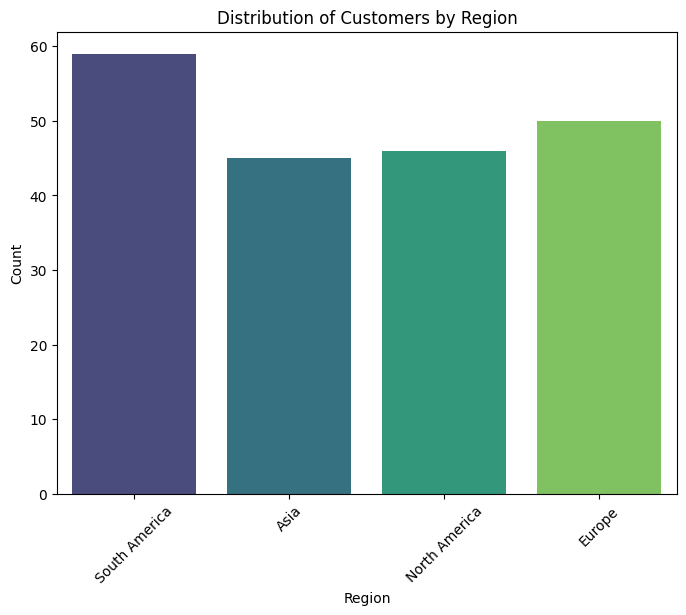

In [11]:
# Distribution of customers by region
plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=customers, palette='viridis')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Top 10 products by total sales value
product_sales = transactions.groupby('ProductID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()
top_products = product_sales.sort_values(by='TotalValue', ascending=False).head(10)


<ipython-input-13-39f80052e29b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='mako')


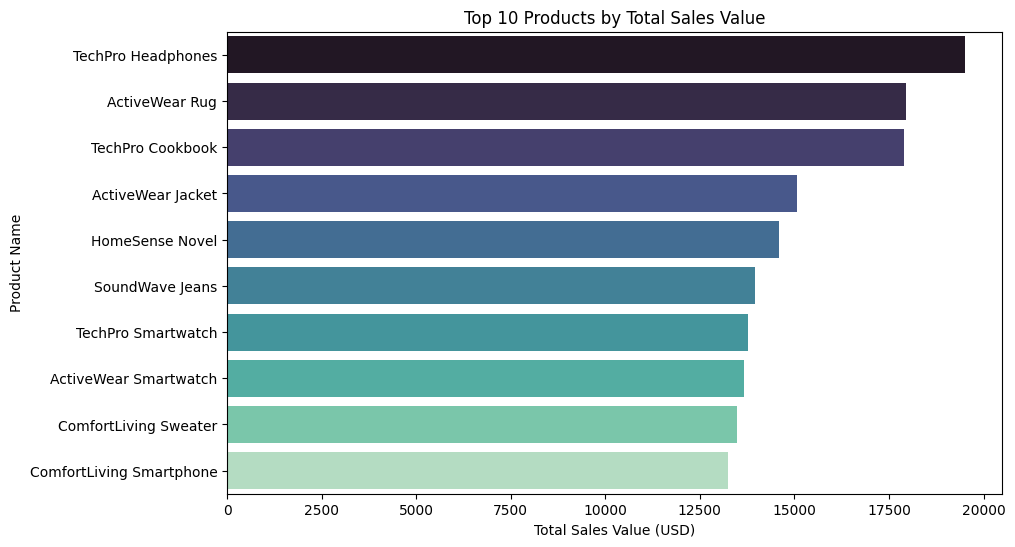

In [13]:
# Merge with product names
top_products = top_products.merge(products, on='ProductID')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='mako')
plt.title('Top 10 Products by Total Sales Value')
plt.xlabel('Total Sales Value (USD)')
plt.ylabel('Product Name')
plt.show()

In [16]:
monthly_trends['MonthYear'] = monthly_trends['MonthYear'].dt.to_timestamp()

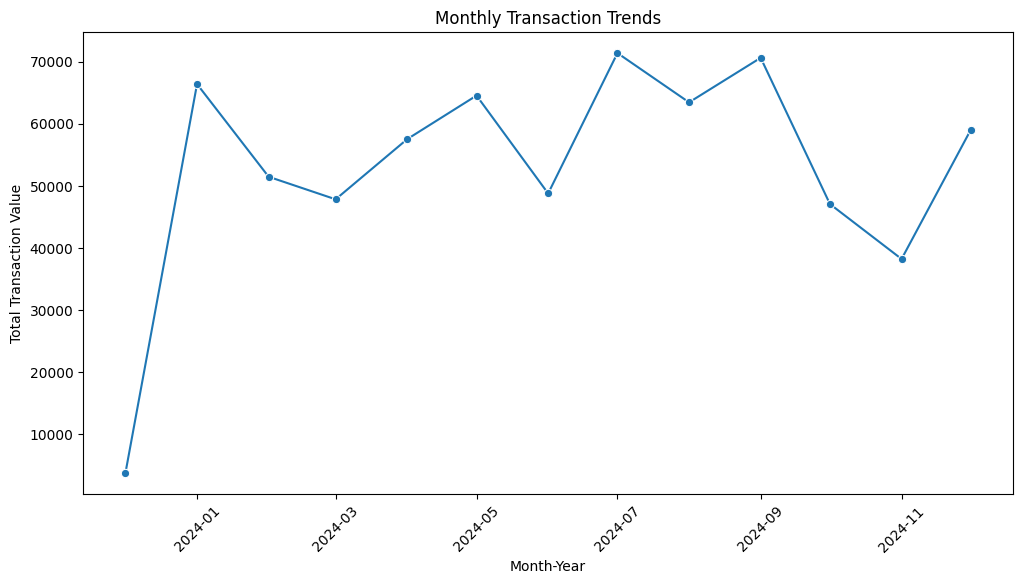

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='MonthYear', y='TotalValue', marker='o')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45)
plt.show()

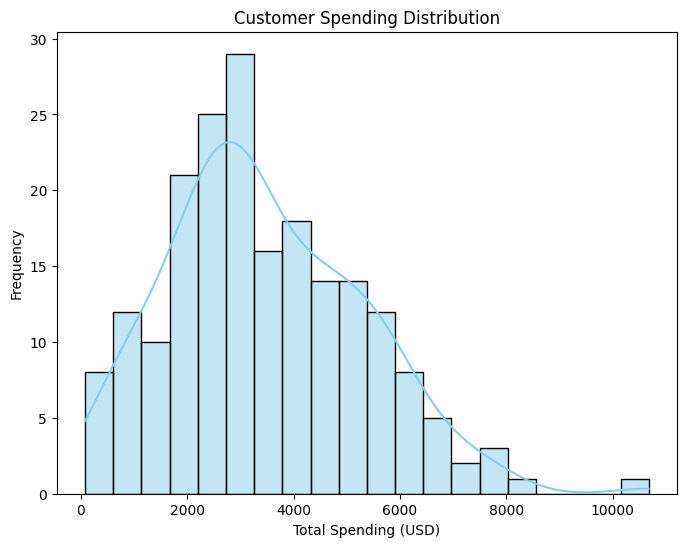

In [18]:
# Analyze customer spending patterns
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending = customer_spending.merge(customers, on='CustomerID')

plt.figure(figsize=(8, 6))
sns.histplot(customer_spending['TotalValue'], bins=20, kde=True, color='skyblue')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending (USD)')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Top 5 customers by total spending
top_customers = customer_spending.sort_values(by='TotalValue', ascending=False).head(5)
print("\nTop 5 Customers by Total Spending:")
print(top_customers[['CustomerID', 'CustomerName', 'TotalValue']])


Top 5 Customers by Total Spending:
    CustomerID   CustomerName  TotalValue
140      C0141   Paul Parsons    10673.87
53       C0054   Bruce Rhodes     8040.39
64       C0065   Gerald Hines     7663.70
155      C0156  William Adams     7634.45
81       C0082   Aimee Taylor     7572.91


<ipython-input-20-91624852037b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='coolwarm')


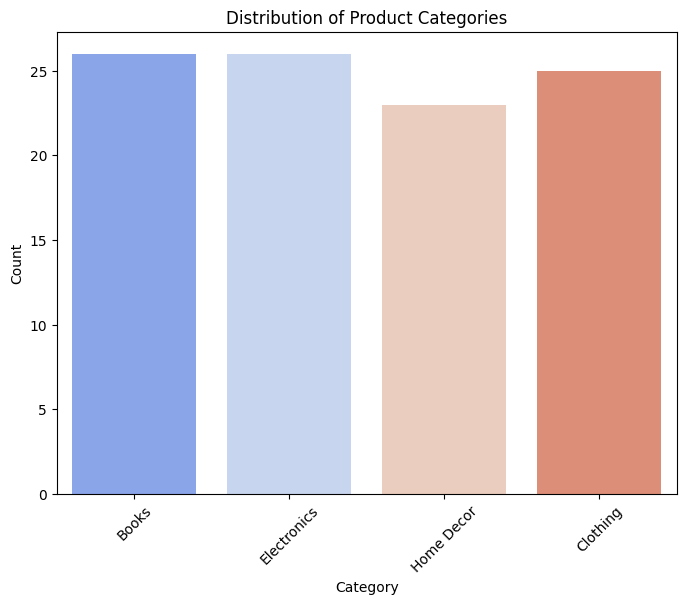

In [20]:
# Distribution of product categories
plt.figure(figsize=(8, 6))
sns.countplot(data=products, x='Category', palette='coolwarm')
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

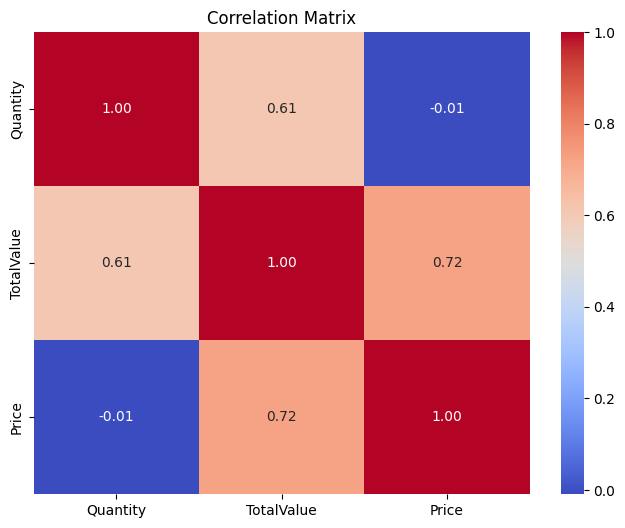

In [21]:
# Correlation matrix for Transactions dataset
plt.figure(figsize=(8, 6))
sns.heatmap(transactions[['Quantity', 'TotalValue', 'Price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


<Axes: title={'center': 'Signup Trend over Time'}, xlabel='SignupMonth'>

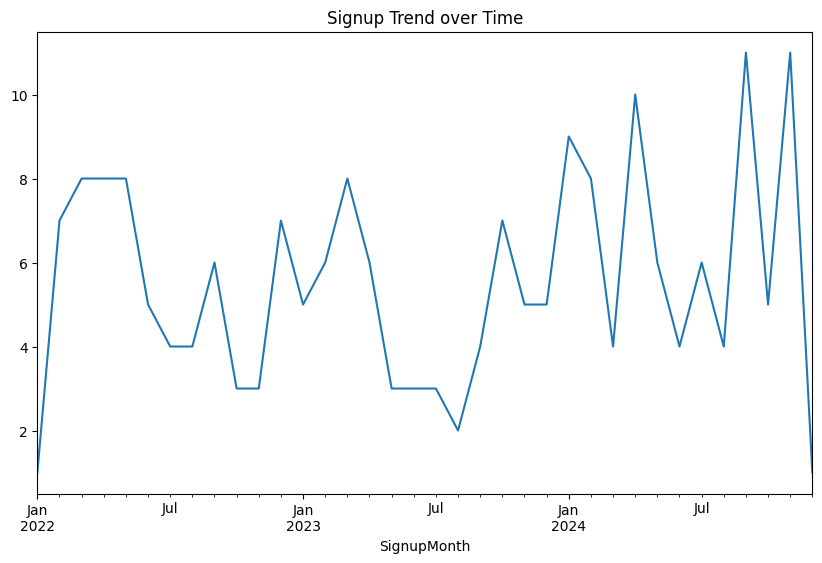

In [22]:
# Sign up Data Analysis
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers['SignupMonth'].value_counts().sort_index()
signup_trends.plot(kind='line', figsize=(10, 6), title="Signup Trend over Time")

<ipython-input-23-b356016d1e58>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region', y='TotalValue', palette='coolwarm')


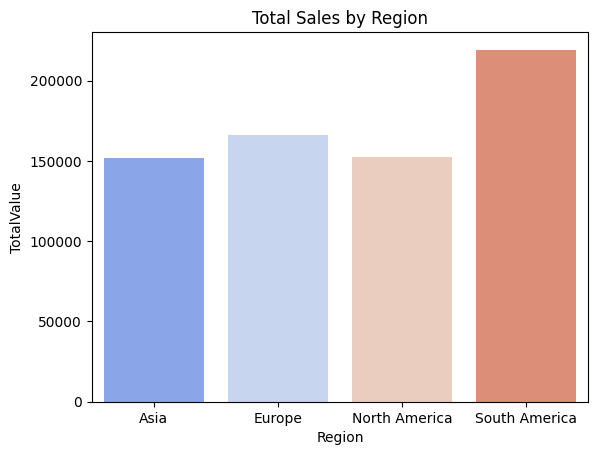

In [23]:
# Sales trends by region
sales_by_region = transactions.groupby('CustomerID').agg({'TotalValue': 'sum'}).reset_index()
sales_by_region = sales_by_region.merge(customers, on='CustomerID')
region_sales = sales_by_region.groupby('Region')['TotalValue'].sum().reset_index()
sns.barplot(data=region_sales, x='Region', y='TotalValue', palette='coolwarm')
plt.title('Total Sales by Region')
plt.show()

<ipython-input-24-090de534fc57>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='TotalValue', palette='Blues_d')


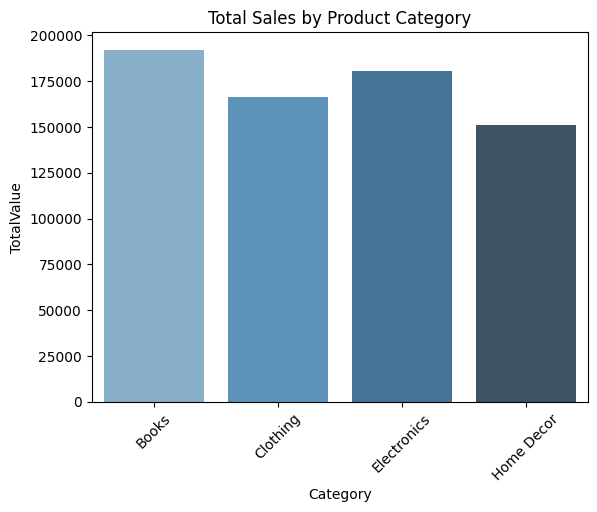

In [24]:
# Product Sales by Category
sales_by_category = product_sales.merge(products[['ProductID', 'Category']], on='ProductID')
category_sales = sales_by_category.groupby('Category')['TotalValue'].sum().reset_index()
sns.barplot(data=category_sales, x='Category', y='TotalValue', palette='Blues_d')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()